In [0]:
import os
import dill
from google.colab import drive

backup_dir = '/content/drive/My Drive/gunlaws'
backup_file = 'word2vec_deeplearning_classifier_env.db'
backup_path = backup_dir + '/' + backup_file
def init_drive():
  # create directory if not exist
  drive.mount('drive')
  if not os.path.exists(backup_dir):
    !mkdir backup_dir

def restart_kernel():
  os._exit(00)

def save_session():
  init_drive()
  dill.dump_session(backup_path)

def load_session():
  init_drive()
  dill.load_session(backup_path)

In [104]:
save_session()

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


TypeError: ignored

In [0]:
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [0]:
df1=pd.read_excel('/content/drive/My Drive/gunlaws/shuffled_gunlaw.xlsx')

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
df1['label']= labelencoder_y.fit_transform(df1['label'])
#labelencoder_x = LabelEncoder()
#X[:,4]=labelencoder_x.fit_transform(X[:,4])
#onehotencoder_x = OneHotEncoder(categorical_features=[4])
#X=onehotencoder_x.fit_transform(X).toarray()

In [14]:
df1.drop(df1.columns[[0]],axis=1,inplace=True)
df1.head()

,date,text,label
0,2019-11-13,🛑 BizPac Review News 🛑 \n\n👉 Schiff blatantly ...,0
1,2019-09-25,🇺🇸 SHALL NOT BE INFRINGED. 🇺🇸 HELL NO!!!\n\nSh...,0
2,2019-11-12,RT @HuCoAction: The #prolife movement desperat...,0
3,2019-11-12,🛑 Gateway Pundit News 🛑 \n\n👉 BANNON WAR ROOM ...,0
4,2019-09-22,RT @sanambna: As we end #InternationalPeaceDay...,1


In [0]:
X_train = df1.loc[:5000,'text'].values
y_train = df1.loc[:5000,'label'].values
X_test = df1.loc[5000:6000,'text'].values
y_test = df1.loc[5000:6000,'label'].values


In [19]:
X_train

array(['🛑 BizPac Review News 🛑 \n\n👉 Schiff blatantly denies knowing who whistleblower is; actor Randy Quaid has a serious question on that \n\nhttps://t.co/7CR1C9Sblf\n\n #MAGA 🇺🇸 ￼￼#2A #Prolife',
       '🇺🇸 SHALL NOT BE INFRINGED. 🇺🇸 HELL NO!!!\n\nShow your stance with this Limited EDITION tee at https://t.co/VNdzynv3Y8 today!\n\n#HellNo #AR15 #comeandtakeit @KayaJones @DLoesch @nrawomen @julieG1 @TomiLahren @KathyFowlerUSA @GrahamAllen_1 @realannapaulina @WatchChad @bethanyshondark https://t.co/TcfB6Fh51T',
       'RT @HuCoAction: The #prolife movement desperately needs coordinated grassroots efforts at the local, regional, state, and national levels.',
       ...,
       '#UkAid aims to prevent more than 5 million unintended pregnancies per year. In fact providing girls with contraceptive pills will not save any single life of the unborn children. #SRHR #UNGA #Prolife https://t.co/hOPfCSF1fY',
       '@RepMattGaetz Liberalism is an ideological fungus that must be eradicated from pl

In [0]:
#from tensorflow.python.keras.preprocessing.text import Tokenizer
#form tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()
total_tweets = X_train.tolist()+X_test.tolist()
tokenizer_obj.fit_on_texts(total_tweets)

max_length = max([len(s.split()) for s in total_tweets])
vocab_size = len(tokenizer_obj.word_index)+1
X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_tokens,maxlen = max_length,padding = 'post')
X_test_pad = pad_sequences(X_test_tokens,maxlen = max_length,padding = 'post')

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM , GRU
from keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

print('Build model...')

model = Sequential()
model.add(Embedding(vocab_size,EMBEDDING_DIM,input_length = max_length))
model.add(GRU(units=32,dropout=0.2 , recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'])

Build model...

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 94, 100)           2497600   
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,510,401
Trainable params: 2,510,401
Non-trainable params: 0
_________________________________________________________________


In [27]:
print('Training.....')
model.fit(X_train_pad, y_train, batch_size=64,epochs=25,validation_data=(X_test_pad,y_test),verbose=2)

Training.....
Train on 5001 samples, validate on 1001 samples
Epoch 1/25
 - 11s - loss: 0.6927 - acc: 0.5193 - val_loss: 0.6929 - val_acc: 0.5115
Epoch 2/25
 - 9s - loss: 0.6929 - acc: 0.5197 - val_loss: 0.6929 - val_acc: 0.5115
Epoch 3/25
 - 9s - loss: 0.6929 - acc: 0.5187 - val_loss: 0.6936 - val_acc: 0.5115
Epoch 4/25
 - 9s - loss: 0.6928 - acc: 0.5197 - val_loss: 0.6929 - val_acc: 0.5115
Epoch 5/25
 - 9s - loss: 0.6929 - acc: 0.5141 - val_loss: 0.6930 - val_acc: 0.5115
Epoch 6/25
 - 9s - loss: 0.6928 - acc: 0.5197 - val_loss: 0.6929 - val_acc: 0.5115
Epoch 7/25
 - 9s - loss: 0.6925 - acc: 0.5205 - val_loss: 0.6935 - val_acc: 0.5115
Epoch 8/25
 - 9s - loss: 0.6927 - acc: 0.5201 - val_loss: 0.6931 - val_acc: 0.5115
Epoch 9/25
 - 9s - loss: 0.6928 - acc: 0.5201 - val_loss: 0.6931 - val_acc: 0.5115
Epoch 10/25
 - 9s - loss: 0.6929 - acc: 0.5201 - val_loss: 0.6930 - val_acc: 0.5115
Epoch 11/25
 - 9s - loss: 0.6926 - acc: 0.5199 - val_loss: 0.6930 - val_acc: 0.5115
Epoch 12/25
 - 9s - lo

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [29]:
from keras.models import Sequential
from keras import layers
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=EMBEDDING_DIM, 
                           input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 94, 100)           2497600   
_________________________________________________________________
flatten_1 (Flatten)          (None, 9400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                94010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 2,591,621
Trainable params: 2,591,621
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9982
Testing Accuracy:  0.9361


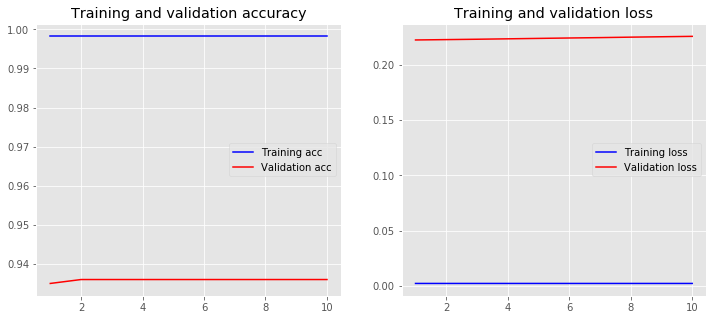

In [34]:
history = model.fit(X_train_pad, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_pad, y_test),
                    batch_size=256)
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [36]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=EMBEDDING_DIM, 
                           input_length=max_length))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 94, 100)           2497600   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 2,498,621
Trainable params: 2,498,621
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9940
Testing Accuracy:  0.9690


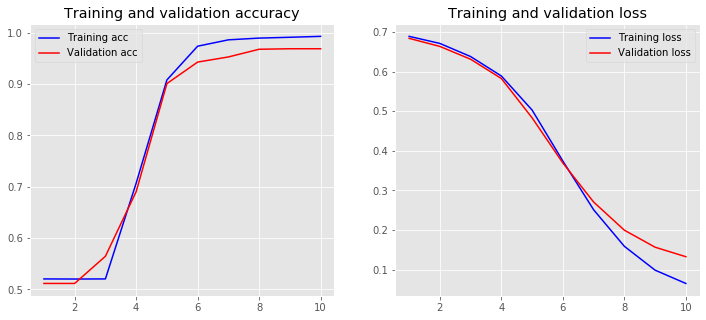

In [40]:
history = model.fit(X_train_pad, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_pad, y_test),
                    batch_size=256)
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [0]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/drive/My Drive/gunlaws/glove.6B.50d.txt',tokenizer_obj.word_index,embedding_dim)

In [44]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.45507687379884687

In [46]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=max_length, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 94, 50)            1248800   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 1,249,321
Trainable params: 521
Non-trainable params: 1,248,800
_________________________________________________________________


Training Accuracy: 0.6837
Testing Accuracy:  0.6414


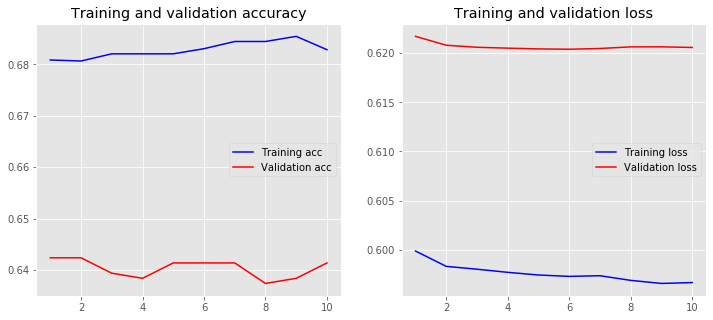

In [49]:
history = model.fit(X_train_pad, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test_pad, y_test),
                    batch_size=256)
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweets_lines=list()
lines=df1['text'].values.tolist()

for line in lines:
  tokens = word_tokenize(line)
  tokens = [w.lower() for w in tokens]
  table = str.maketrans('','',string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in stripped if word.isalpha()]
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  tweets_lines.append(words)

In [60]:
import gensim
model = gensim.models.Word2Vec(sentences=tweets_lines,size=EMBEDDING_DIM,window=10,workers=4,min_count=1)
words = list(model.wv.vocab)
print('Vocabulary size:', len(words))

Vocabulary size: 53381


In [67]:
model.wv.most_similar('antigun')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('uneducated', 0.9912393689155579),
 ('intent', 0.9899209141731262),
 ('terrorists', 0.9895254373550415),
 ('abracadabra', 0.9890122413635254),
 ('governorva', 0.9884691834449768),
 ('randy', 0.9884379506111145),
 ('nutjob', 0.988203763961792),
 ('immigrants', 0.9881791472434998),
 ('filthy', 0.9873313903808594),
 ('ndp', 0.9872932434082031)]

In [69]:
model.wv.save_word2vec_format('/content/drive/My Drive/gunlaws/gulaws_embedding_word2vec.txt',binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [70]:
import os
embeddings_index={}
f= open(os.path.join('','/content/drive/My Drive/gunlaws/gulaws_embedding_word2vec.txt'),encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.array(values[1:])
  embeddings_index[word]=coefs
f.close

<function TextIOWrapper.close>

In [73]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweets_lines)
sequences = tokenizer_obj.texts_to_sequences(tweets_lines)

word_index = tokenizer_obj.word_index
print('Found %s unique tokens.',len(word_index))

tweets_pad = pad_sequences(sequences,maxlen=max_length)
sentiment = df1['label'].values
print('shape of tweets',tweets_pad.shape)
print('shape of sentiment',sentiment.shape)

Found %s unique tokens. 53381
shape of tweets (42103, 94)
shape of sentiment (42103,)


In [0]:
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

for word , i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i]=embedding_vector

In [76]:
print(num_words)

53382


In [118]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM , GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

model = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer = Constant(embedding_matrix),
                            input_length = max_length,
                            trainable=False)
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

#model.add(GRU(units=32 , dropout = 0.2 , recurrent_dropout = 0.2))
#model.add(Dense(1 ,activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 94, 100)           5338200   
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 5,339,221
Trainable params: 1,021
Non-trainable params: 5,338,200
_________________________________________________________________


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_testing ,y_train, y_testing = train_test_split(tweets_pad, sentiment, test_size = 0.50, random_state = 1)

In [0]:
X_test, X_val ,y_test, y_val = train_test_split(X_testing, y_testing, test_size = 0.50, random_state = 0)

In [124]:
print('Training.....')
history=model.fit(X_train, y_train, batch_size=256,epochs=50,validation_data=(X_val,y_val),verbose=True)

Training.....
Train on 21051 samples, validate on 10526 samples
Epoch 1/50
21051/21051 [==============================] - 1s 27us/step - loss: 0.2092 - acc: 0.9117 - val_loss: 0.2028 - val_acc: 0.9145
Epoch 2/50
21051/21051 [==============================] - 1s 29us/step - loss: 0.2061 - acc: 0.9121 - val_loss: 0.2009 - val_acc: 0.9158
Epoch 3/50
21051/21051 [==============================] - 1s 27us/step - loss: 0.2045 - acc: 0.9119 - val_loss: 0.1984 - val_acc: 0.9160
Epoch 4/50
21051/21051 [==============================] - 1s 27us/step - loss: 0.2027 - acc: 0.9138 - val_loss: 0.1979 - val_acc: 0.9172
Epoch 5/50
21051/21051 [==============================] - 1s 28us/step - loss: 0.2012 - acc: 0.9150 - val_loss: 0.1949 - val_acc: 0.9179
Epoch 6/50
21051/21051 [==============================] - 1s 27us/step - loss: 0.1989 - acc: 0.9159 - val_loss: 0.1937 - val_acc: 0.9193
Epoch 7/50
21051/21051 [==============================] - 1s 27us/step - loss: 0.1977 - acc: 0.9162 - val_loss: 0.

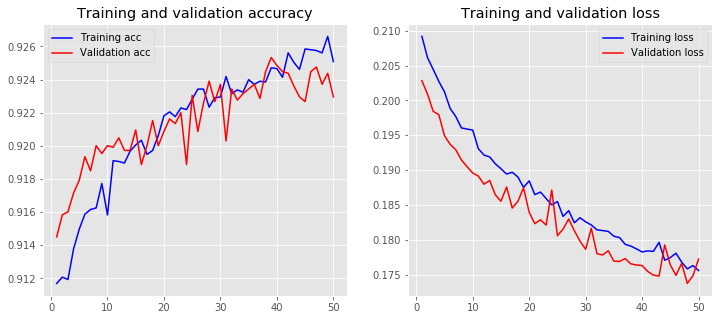

In [125]:
plot_history(history)

In [126]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.9204
